In [1]:
include("../init-notebook.jl")

(section-linsys-norms)=
# Vector and matrix norms

The manipulations on matrices and vectors so far in this chapter have been algebraic, much like those in an introductory linear algebra course. In order to progress to the analysis of the algorithms we have introduced, we need a way to measure the size of vectors and matrices—size in the sense of magnitude or distance, not the number of rows and columns.

## Vector norms

```{index} ! norm; vector
```

For vectors we use a **norm** $\| \cdot \|$, which is a function from $\real^n$ to $\real$ with the following properties for all $n$-vectors $\mathbf{x},\mathbf{y}$ and scalars $\alpha$:[^complexnorm]

[^complexnorm]: The same statements works for vectors with complex entries, with complex modulus in place of absolute values.
  
```{math}
:label: norm-properties
\| \mathbf{x} \| &\ge 0 \\
\| \mathbf{x} \| &=0 \;\Leftrightarrow \; \mathbf{x}=\boldsymbol{0} \\
\| \alpha \mathbf{x} \| &= |\alpha|\, \| \mathbf{x}\| \\
\| \mathbf{x}+\mathbf{y} \| & \le \| \mathbf{x} \| + \| \mathbf{y} \|.
```

The last of these properties is known as the **triangle inequality**. It is natural to interpret $\| \mathbf{x} \|=\| \mathbf{x}-\boldsymbol{0} \|$ as the distance from $\mathbf{x}$ to the origin and $\| \mathbf{x}-\mathbf{y} \|$ as the distance from $\mathbf{x}$ to $\mathbf{y}$. We will be using only the three most important vector norms, defined as follows.

(definition-norms-vectornorms)=
:::{proof:definition} Common vector norms
**2-norm:** $\quad \| \mathbf{x} \|_2 = \left( \displaystyle \sum_{i=1}^n |x_i|^2 \right)^{\frac{1}{2}} = \sqrt{\rule[1mm]{0pt}{0.75em}\mathbf{x}^T \mathbf{x}}$

**$\infty$-norm** or **max-norm:** $ \quad \| \mathbf{x} \|_\infty = \displaystyle \max_{i=1,\dots,n} |x_i|$

**1-norm:** $\quad \| \mathbf{x} \|_1 = \displaystyle \sum_{i=1}^n |x_i| $
:::

The 2-norm corresponds to ordinary Euclidean distance. 

```{index} ! unit vector
```

In any norm, we refer to a vector $\mathbf{x}$ satisfying $\| \mathbf{x} \|=1$ as a **unit vector**. For any nonzero vector $\mathbf{v}$ we can find a unit vector through the normalization $\mathbf{x}=\mathbf{v}/\|\mathbf{v}\|$. Thus, we can interpret

```{math}
  :label: magdir
  \mathbf{v} = \| \mathbf{v} \| \,\cdot\, \frac{\mathbf{v}}{\| \mathbf{v} \|}
```

as writing a nonzero vector $\mathbf{v}$ in magnitude–direction form. 

(demo-norms-vector)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Given the vector $\mathbf{x}= \bigl[ 2 ,\, -3 ,\, 1 ,\, -1 \bigr]^T$, we have
\begin{align*}
    \| \mathbf{x} \|_2 &= \sqrt{ 4 + 9 + 1 + 1 } = \sqrt{15}, \\[1ex]
    \| \mathbf{x} \|_\infty &= \max\{ 2,3,1,1 \} = 3,\\[1ex]
    \| \mathbf{x} \|_1 &= 2 + 3 + 1 + 1 = 7.
\end{align*}

```{index} ! Julia; norm
```

In Julia the `LinearAlgebra` package has a `norm` function for vector norms.

In [2]:
x = [2,-3,1,-1]
twonorm = norm(x)         # or norm(x,2)

3.872983346207417

In [3]:
infnorm = norm(x,Inf)

3.0

In [4]:
onenorm = norm(x,1)

7.0

```{index} ! Julia; normalize
```

There is also a `normalize` function that divides a vector by its norm, making it a unit vector.

In [5]:
normalize(x,Inf)

4-element Vector{Float64}:
  0.6666666666666666
 -1.0
  0.3333333333333333
 -0.3333333333333333

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

:::{note}
Most of the time, when just $\| \mathbf{x} \|$ is written, the 2-norm is implied. However, in this section we use it to mean a generic, unspecified vector norm.
:::

We say that a sequence of vectors $\mathbf{x}_1.\mathbf{x}_2,\ldots$ **converges** to $\mathbf{x}$ if

```{math}
  :label: vectorconverge
  \lim_{k\rightarrow\infty} \| \mathbf{x}_k - \mathbf{x} \| = 0.
```

By definition, a sequence is convergent in the infinity norm if and only if it converges componentwise. The same is true for a convergent sequence in *any* norm.

(theorem-normequivalence)=
```{proof:theorem} Norm equivalence
  In a finite-dimensional space, convergence in any norm implies convergence in all norms.
```

## Matrix norms

```{index} ! norm; Frobenius
```

Although we view matrices as two-dimensional, we can also interpret them as vectors: simply stack the columns on top of one another.[^colmajor] Hence we can define matrix norms via vector norms. This is sometimes done with the vector 2-norm and leads to the matrix **Frobenius norm**:

```{math}
:label: frobenius
\| \mathbf{A} \|_F = \left( \sum_{i,j} |A_{ij}|^2 \right)^{1/2}
```

```{index} Julia; norm
```

This is the norm computed by the norm function in Julia.

[^colmajor]: Column stacking is actually how matrices are stored in memory within Julia and is known as **column-major order**. MATLAB and FORTRAN also use column-major order, while C and Python use row-major order, in which the rows are stacked.

However, it often proves to be more useful to define matrix norms differently. 

```{index} ! norm; matrix
```

(definition-norms-matrix)=
::::{proof:definition} Induced matrix norm
Given a vector norm $\| \cdot \|_p$, we define an **induced matrix norm** for any $m\times n$ matrix $\mathbf{A}$ as

```{math}
:label: matrixnorm
\| \mathbf{A} \|_{p} = \max_{\| \mathbf{x} \|_p=1} \| \mathbf{A}\mathbf{x} \|_p =
\max_{\mathbf{x}\neq \boldsymbol{0}} \frac{\| \mathbf{A}\mathbf{x} \|_p}{\| \mathbf{x} \|_p}.
```
::::

The last equality above follows from linearity (as shown in [an exercise](problem-linearity)).  It is derived from the interpretation of a matrix as a linear operator between $\real^n$ and $\real^m$. Thus in the 2-norm, for instance,

```{math}
\| \mathbf{A} \|_2 = \max_{\| \mathbf{x} \|_2=1} \| \mathbf{A}\mathbf{x} \|_2.
```

For the rest of this section we will continue to omit subscripts when we want to refer to an unspecified norm; after this section, an unsubscripted norm is understood to be the 2-norm.

The definition of an induced matrix norm may seem oddly complicated. However, there are some key properties that follow directly from the definition.


(theorem-norms-inequalities)=
````{proof:theorem} Norm inequalities
Let $\| \cdot \|$ designate a matrix norm and the vector norm that induced it. Then for all matrices and vectors of compatible sizes,

```{math}
:label: normineq1
\| \mathbf{A}\mathbf{x} \| \le \| \mathbf{A} \|\cdot \| \mathbf{x} \|.
```

For all matrices of compatible sizes,

```{math}
:label: normineq2
\| \mathbf{A}\mathbf{B} \| \le \| \mathbf{A} \|\cdot\| \mathbf{B} \|.
```

For a square matrix $\mathbf{A}$,

```{math}
:label: normineq3
\| \mathbf{A}^k \| \le \| \mathbf{A} \|^k \text{ for any integer $k\ge 0$.}
```
````

````{proof:proof}

The first result is trivial if $\mathbf{x}=\boldsymbol{0}$; otherwise,

```{math}
\frac{ \| \mathbf{A}\mathbf{x} \| }{\| \mathbf{x} \|} \le
\max_{\mathbf{x}\neq \boldsymbol{0}}  \frac{\| \mathbf{A}\mathbf{x} \|}{\| \mathbf{x} \|} = \| \mathbf{A} \|.
```

Inequality {eq}`normineq2` then follows because

```{math}
\| \mathbf{A}\mathbf{B}\mathbf{x} \| =\| \mathbf{A}(\mathbf{B}\mathbf{x}) \|\le \| \mathbf{A} \|\cdot\| \mathbf{B}\mathbf{x} \| \le
\| \mathbf{A} \|\cdot\| \mathbf{B} \|\cdot\| \mathbf{x} \|,
```

and then

```{math}
\| \mathbf{A}\mathbf{B} \| = \max_{\mathbf{x}\neq \boldsymbol{0}} \frac{\| \mathbf{A}\mathbf{B}\mathbf{x} \|}{\| \mathbf{x} \|} \le
\max_{\mathbf{x}\neq \boldsymbol{0}} \| \mathbf{A} \|\cdot\| \mathbf{B} \| = \| \mathbf{A} \|\cdot\| \mathbf{B} \|.
```

Finally,  {eq}`normineq3` results from repeated application of {eq}`normineq2`.
````

One can interpret the definition of an induced norm geometrically.  Each vector $\mathbf{x}$ on the unit "sphere" (as defined by the chosen vector norm) is mapped to its image $\mathbf{A}\mathbf{x}$, and the norm of $\mathbf{A}$ is the radius of the smallest "sphere" that encloses all such images. 

In addition, two of the vector norms we have encountered lead to equivalent formulas that are easy to compute from the matrix elements.

::::{proof:theorem} Matrix $\infty$-norm and 1-norm

```{math}
:label: mxinfnorm
\| \mathbf{A} \|_\infty = \max_{1\le \,i \,\le n} \sum_{j=1}^n |A_{ij}|,
```

```{math}
:label: mxonenorm
\| \mathbf{A} \|_1 = \max_{1\le \,j\, \le n} \sum_{i=1}^n |A_{ij}|.
```
::::

A mnemonic for these is that the $\infty$ symbol extends horizontally while the 1 character extends vertically, each indicating the direction of the summation in its formula. Also, both formulas give the same result for $m\times 1$ matrices as the vector norm. In both cases you must take absolute values of the matrix elements first. 


(demo-norms-matrix)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

In [6]:
A = [ 2 0; 1 -1 ]

2×2 Matrix{Int64}:
 2   0
 1  -1

In Julia one uses `norm` for vector norms and for the Frobenius norm of a matrix, which is like stacking the matrix into a single vector before taking the 2-norm.

In [7]:
Fronorm = norm(A)

2.449489742783178

```{index} ! Julia; opnorm
```

Most of the time we want to use `opnorm`, which is an induced matrix norm. The default is the 2-norm.

In [8]:
twonorm = opnorm(A)

2.2882456112707374

You can get the 1-norm as well.

In [9]:
onenorm = opnorm(A,1)

3.0

```{index} ! Julia; maximum, ! Julia; minimum, ! Julia; sum
```

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
According to {eq}`mxonenorm`, the matrix 1-norm is equivalent to the maximum of the sums down the columns (in absolute value).

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
Use `sum` to sum along a dimension of a matrix. You can also sum over the entire matrix by omitting the `dims` argument.

The `maximum` and `minimum` functions also work along one dimension or over an entire matrix. To get both values at once, use `extrema`.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [10]:
maximum( sum(abs.(A),dims=1) )   # sum down the rows (1st matrix dimension)

3

Similarly, we can get the $\infty$-norm and check our formula for it.

In [11]:
infnorm = opnorm(A,Inf)

2.0

In [12]:
maximum( sum(abs.(A),dims=2) )   # sum across columns (2nd matrix dimension)

2

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Next we illustrate a geometric interpretation of the 2-norm. First, we will sample a lot of vectors on the unit circle in $\mathbb{R}^2$.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
You can use functions as values, e. g. as elements of a vector. 
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [13]:
theta = 2pi*(0:1/600:1)
x = [ fun(t) for fun in [cos,sin], t in theta ];    # 601 unit columns

```{index} ! Julia; subplots
```

To create an array of plots, start with a `plot` that has a `layout` argument, then do subsequent `plot!` calls with a `subplot` argument.

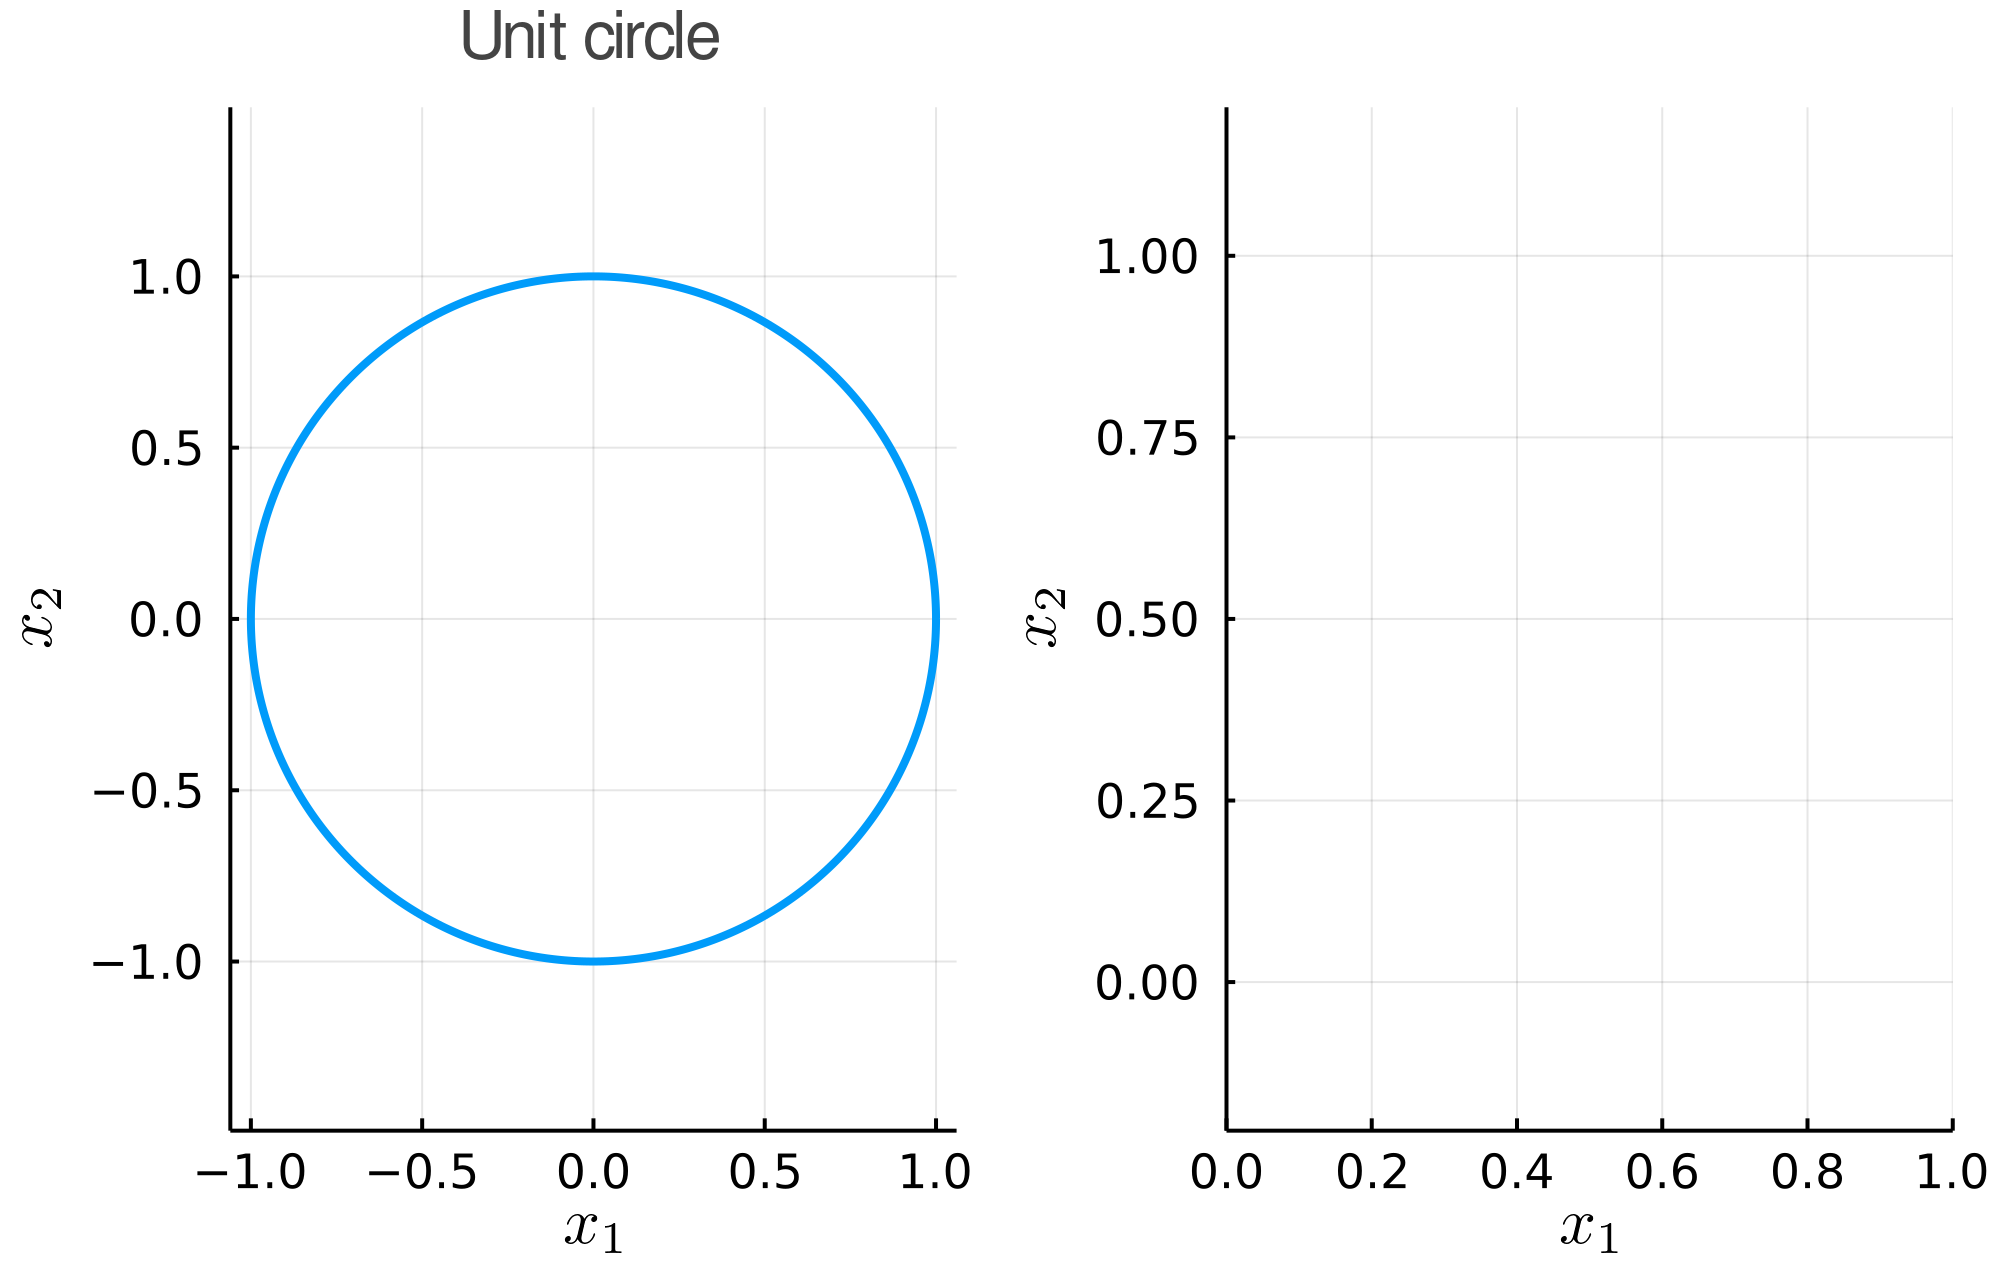

In [14]:
plot(aspect_ratio=1, layout=(1,2), leg=:none, xlabel=L"x_1", ylabel=L"x_2")
plot!(x[1,:],x[2,:],subplot=1,title="Unit circle") 

The linear function $\mathbf{f}(\mathbf{x}) = \mathbf{A}\mathbf{x}$ defines a mapping from $\mathbb{R}^2$ to $\mathbb{R}^2$. We can apply `A` to every column of `x` by using a single matrix multiplication.

In [15]:
Ax = A*x;

The image of the transformed vectors is an ellipse.

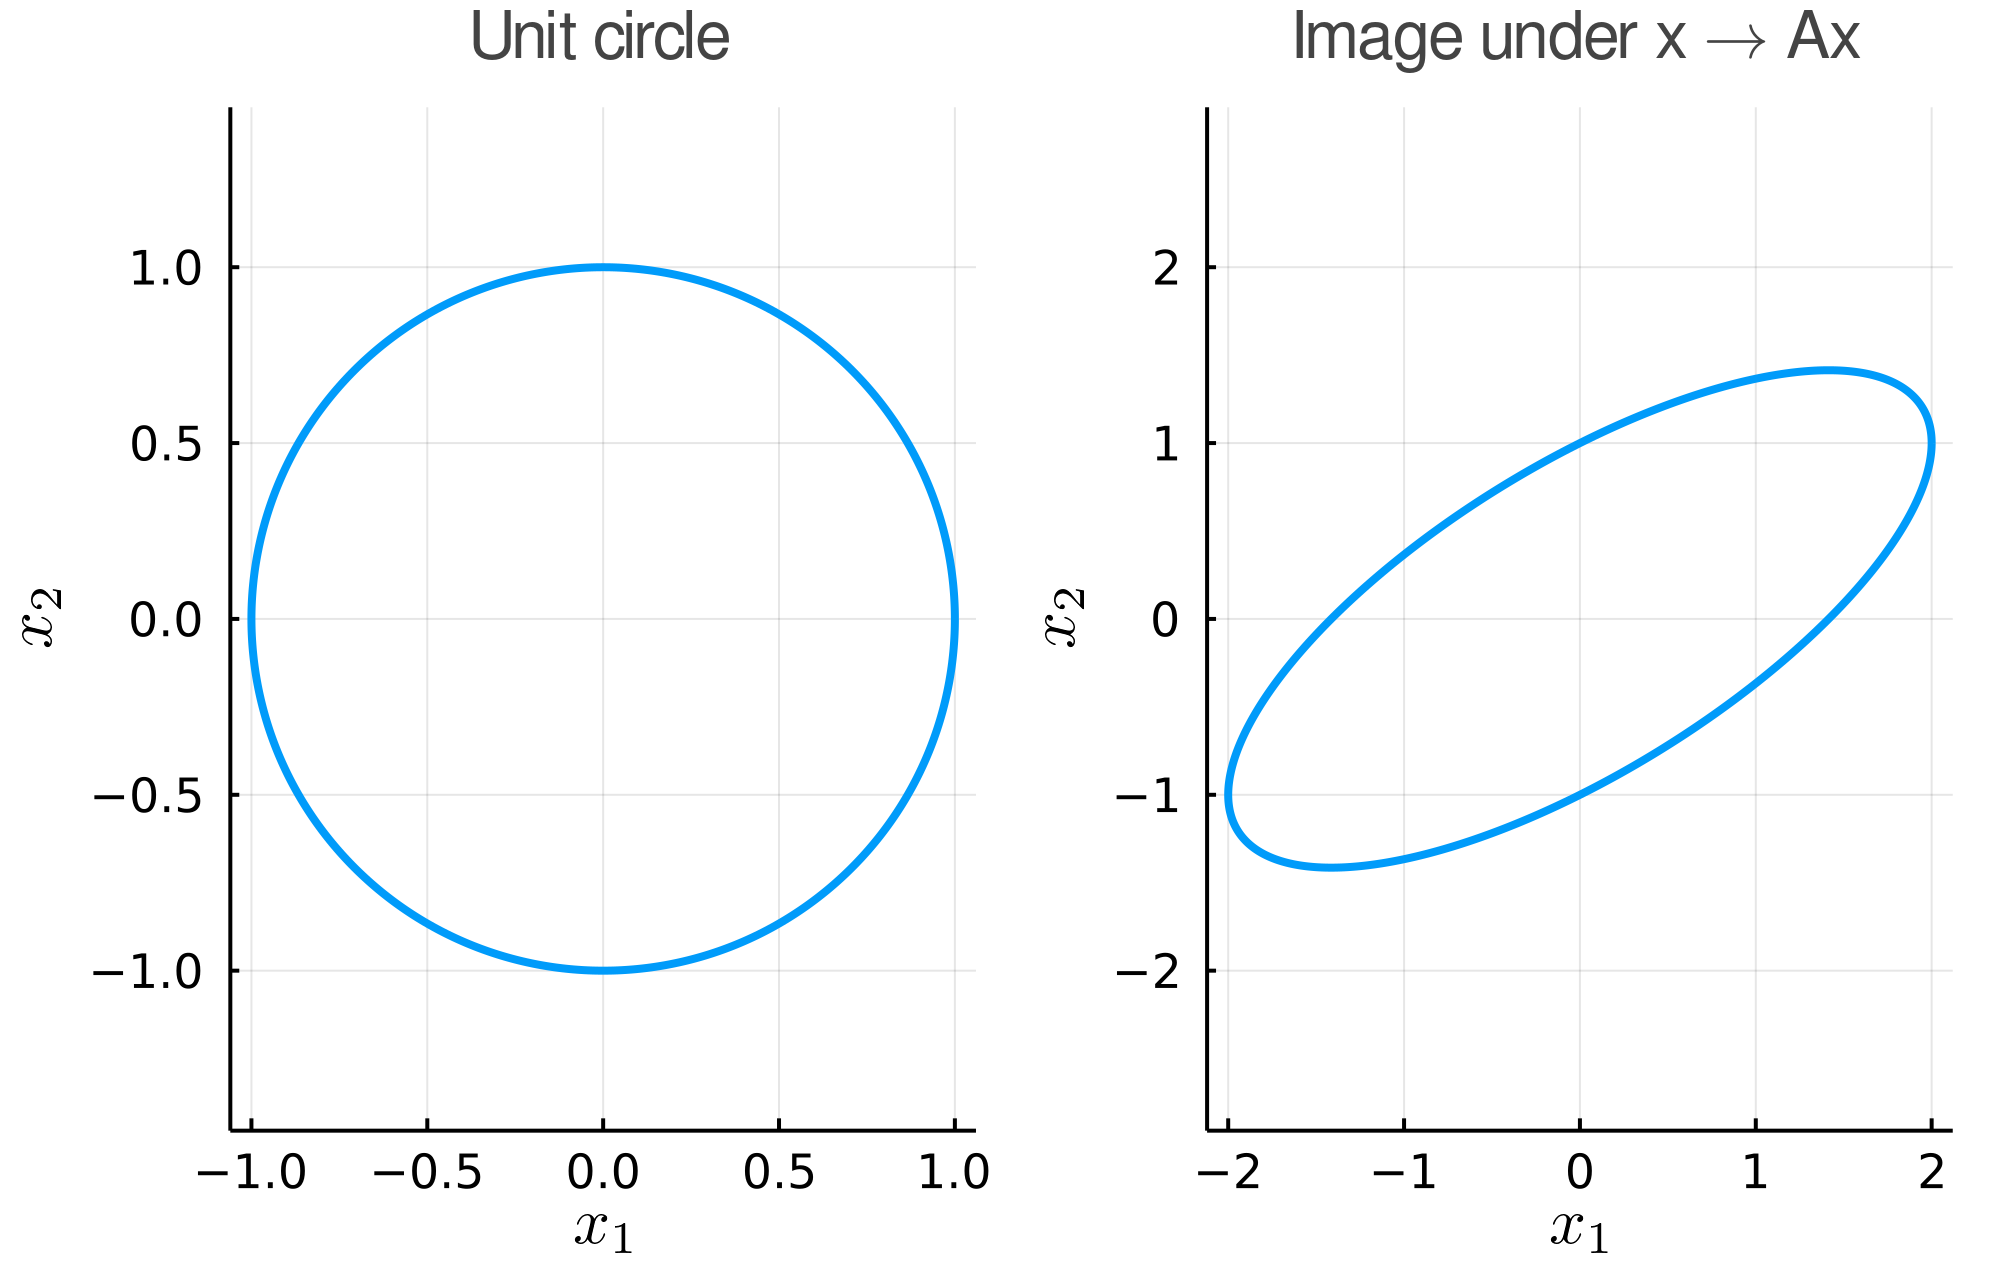

In [16]:
plot!(Ax[1,:],Ax[2,:],subplot=2,title="Image under x → Ax")

That ellipse just touches the circle of radius $\|\mathbf{A}\|_2$.

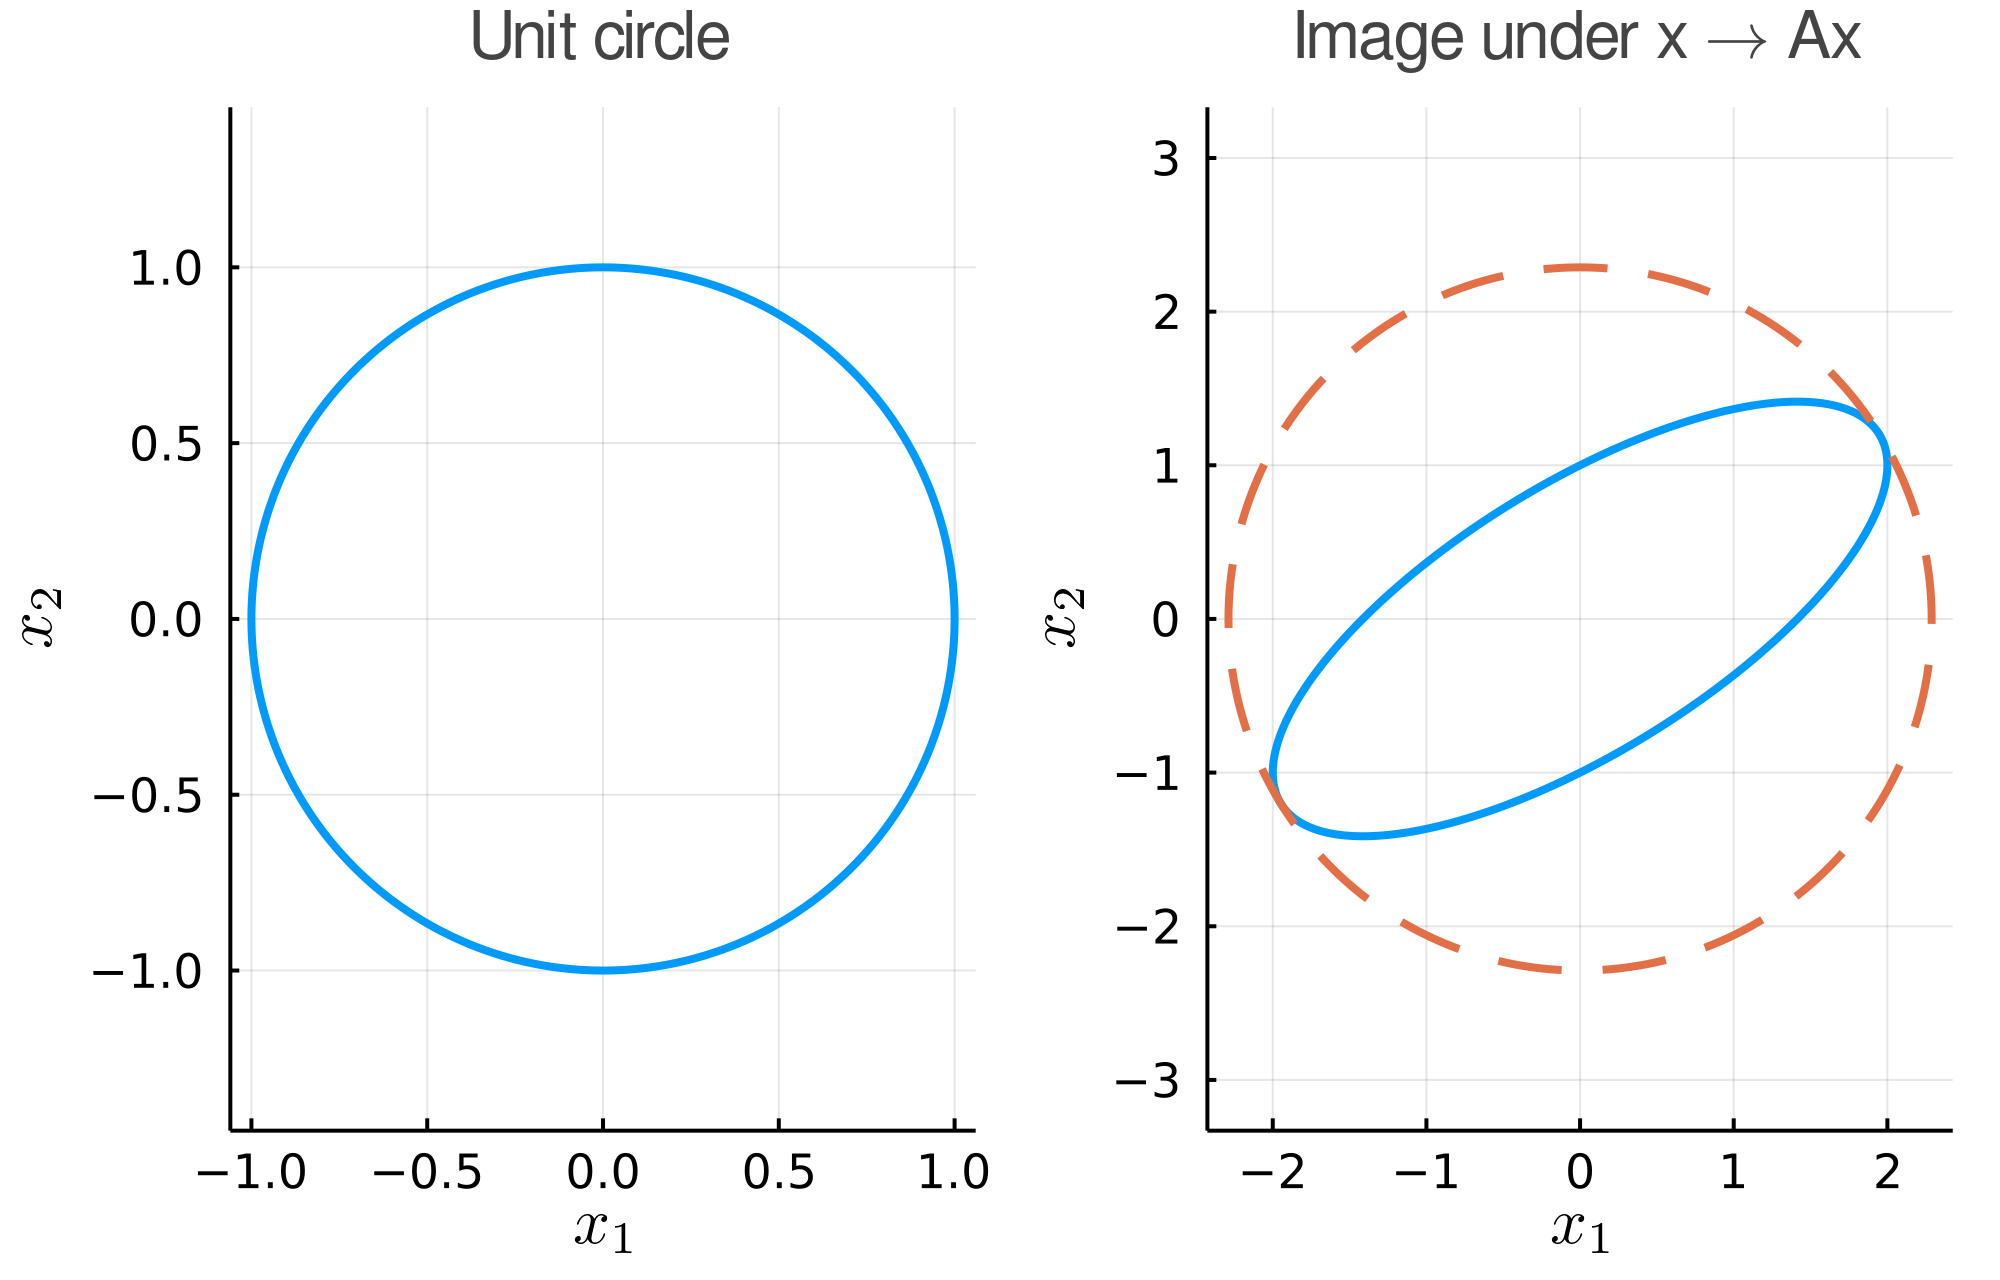

In [17]:
plot!(twonorm*x[1,:],twonorm*x[2,:],subplot=2,l=:dash)

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

The geometric interpretation of the matrix 2-norm shown in {numref}`Demo %s <demo-norms-matrix>`, as the radius of the smallest circle (or sphere or hypersphere in higher dimensions) containing the images of all unit vectors, is not a practical means of computing the norm. Nor is there a simple formula like {eq}`mxinfnorm` or {eq}`mxonenorm` for it. The computation of the matrix 2-norm is discussed further in Chapter 7.

## Exercises

1. ✍ Why is the vector 1-norm also called the *taxicab norm*?

2. ✍ **(a)** Draw the unit "circle" in the $\infty$-norm, i.e., the set of all vectors $\mathbf{x}\in\real^2$ such that $\| \mathbf{x} \|_\infty=1$.

    **(b)** Draw the unit "circle" in the 1-norm.
  
3. ✍ Prove that for all vectors $\mathbf{x}\in\real^n$,

    **(a)** $\| \mathbf{x} \|_\infty \le \| \mathbf{x} \|_2; \qquad$ 
    **(b)** $\| \mathbf{x} \|_2 \le \| \mathbf{x} \|_1$.

4. ✍ Prove that for any vectors $\mathbf{x}$, $\mathbf{y}$ in $\real^n$, $|\mathbf{x}^T\mathbf{y}| \le \| \mathbf{x} \|_1\| \mathbf{y} \|_\infty$.

    (problem-linearity)=
5. ✍ Prove using {numref}`Definition {number} <definition-norms-matrix>` that for any induced matrix norm, matrix $\mathbf{A}$, and scalar $c$, $\| c\mathbf{A} \| = |c|\cdot \| \mathbf{A} \|$.

6. ✍ Let $\mathbf{A} =
    \displaystyle \begin{bmatrix}
      -1 & 1 \\ 2 & 2
    \end{bmatrix}.$

    **(a)** Find all vectors satisfying $\|\mathbf{x}\|_\infty=1$ and $\| \mathbf{A}\mathbf{x} \|_\infty=\| \mathbf{A} \|_\infty$.

    **(b)** Find a vector satisfying $\|\mathbf{x}\|_1=1$ and $\| \mathbf{A}\mathbf{x} \|_1=\| \mathbf{A} \|_1$.

    **(c)** Find a vector satisfying $\|\mathbf{x}\|_2=1$ such that $\| \mathbf{A}\mathbf{x} \|_2=\| \mathbf{A} \|_2$. (Hint: A unit 2-dimensional vector is a function only of its angle with the $x_1$-axis. Use the definition of $\|\mathbf{A}\|_2$ as the maximum of $\|\mathbf{A}\mathbf{x}\|_2$, which is a also a function of the angle.)

7. ✍ Prove the equivalence of the two formulas for a matrix norm in {eq}`matrixnorm`.

8. ✍ Prove that for any induced matrix norm and nonsingular matrix $\mathbf{A}$, $\| \mathbf{A}^{-1} \| \ge (\| \mathbf{A} \|)^{-1}$. (Hint: Apply {numref}`Theorem %s <theorem-norms-inequalities>`.)

9.  ✍ **(a)** Prove that for any $\mathbf{v}\in \real^n$,

    ```{math}
    \| \mathbf{v} \|_p \ge \max_{i=1,\ldots,n} |v_i|,
    ```

    where $p=1$, $2$, or $\infty$.

    **(b)** Prove that for any $\mathbf{A}\in\real^{n \times n}$,

    ```{math}
    \| \mathbf{A} \|_p \ge \max_{i,j=1,\ldots,n} |A_{ij}|,
    ```

    where $p=1$, $2$, or $\infty$. (Hint: For $p=2$, rearrange {eq}`normineq1` for a well-chosen particular value of $\mathbf{x}$.)

    (problem-norms-diagnorm)=
10. ✍ Prove using {numref}`Definition {number} <definition-norms-matrix>` that if $\mathbf{D}$ is a diagonal matrix, then $\|\mathbf{D}\|_2 = \max_{i} |D_{ii}|$. You may assume the matrix is real and square, but that does not affect the result or the proof in any significant way. (Hint: Let $M=\max_{i} |D_{ii}|$. Proceed in two stages, showing that $\|\mathbf{D}\|_2\ge M$ and separately that $\|\mathbf{D}\|_2\le M$.)

11.  ✍ Suppose that $\mathbf{A}$ is ${n\times n}$ and that $\| \mathbf{A} \|<1$ in some induced matrix norm.

    **(a)** Show that $(\mathbf{I}-\mathbf{A})$ is nonsingular. (Hint: Show that $(\mathbf{I}-\mathbf{A})\mathbf{x}=\boldsymbol{0}$ for nonzero $\mathbf{x}$ implies that $\| \mathbf{A} \|\ge 1$, using the definition of an induced matrix norm.)

    **(b)** Show that $\lim_{m\rightarrow \infty} \mathbf{A}^m = \boldsymbol{0}$. (For matrices as with vectors, we say $\mathbf{B}_m \rightarrow \mathbf{L}$ if $\| \mathbf{B}_m-\mathbf{L} \| \rightarrow 0$.)

    **(c)** Use (a) and (b) to show that we may obtain the geometric series

    ```{math}
    (\mathbf{I}-\mathbf{A})^{-1} = \sum_{k=0}^\infty \mathbf{A}^k.
    ```

    (Hint: Start with $\left(\sum_{k=0}^m \mathbf{A}^k\right)(\mathbf{I}-\mathbf{A})$ and take the limit.)